In [1]:
from NeuroKit.network import NeuralNetwork
from NeuroKit.dense import Dense
from NeuroKit.activations import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [12]:
# Generate multiclass dataset
num_samples = 1000
scale = 5

X = np.random.randn(num_samples,2)* scale
Y = np.zeros((num_samples, 1), dtype=int)

# Use the first two features to determine the classes
X_features = X[:, :2]
Y[X_features[:, 0]**2 + X_features[:, 1]**2 < (2*scale**2)] = 0
Y[(X_features[:, 0]**2 + X_features[:, 1]**2 >= (2*scale**2)) & 
  (X_features[:, 0]**2 + X_features[:, 1]**2 < (4 *scale**2))] = 1
Y[X_features[:, 0]**2 + X_features[:, 1]**2 >= (4 * scale**2)] = 2

X, Y[:10]

(array([[ 6.98997746,  2.3197571 ],
        [ 3.75857482,  4.19893991],
        [-1.60461482, -1.36825831],
        ...,
        [-2.06130306,  4.42627666],
        [ 0.99054184, -0.62037691],
        [ 1.1273268 , -6.51447345]]),
 array([[1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1]]))

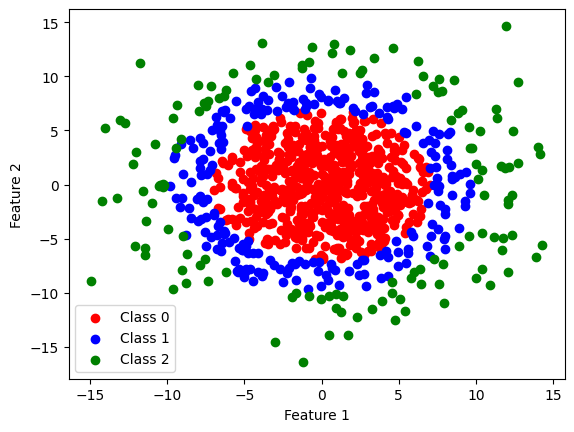

In [5]:
# Plot the dataset
plt.scatter(X[Y.flatten() == 0][:, 0], X[Y.flatten() == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[Y.flatten() == 1][:, 0], X[Y.flatten() == 1][:, 1], color='blue', label='Class 1')
plt.scatter(X[Y.flatten() == 2][:, 0], X[Y.flatten() == 2][:, 1], color='green', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()    

In [6]:
# One-hot encode the target
Y = np.eye(3)[Y.flatten()]

Y

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [7]:
# Create the neural network
nn = NeuralNetwork()
nn.add(Dense(2, 16, activation=Relu()))
nn.add(Dense(16, 16, activation=Relu()))
nn.add(Dense(16, 3, activation=Softmax()))


nn.compile(optimizer='sgd', loss='cross_entropy', metrics=['accuracy'])
nn.earlystopping()

In [8]:
# Train the neural network
nn.fit(X, Y, epochs=1000, batch_size=15)

Epoch: 0, Error: 4.371683961794139, accuracy: 0.4510
Epoch: 1, Error: 2.4048019085664616, accuracy: 0.5260
Epoch: 2, Error: 1.4710859592220125, accuracy: 0.6410
Epoch: 3, Error: 0.9910520969364764, accuracy: 0.6890
Epoch: 4, Error: 0.9214940195594903, accuracy: 0.7190
Epoch: 5, Error: 0.7578018784307585, accuracy: 0.7370
Epoch: 6, Error: 0.6264599204530249, accuracy: 0.7750
Epoch: 7, Error: 0.5016800669617032, accuracy: 0.7970
Epoch: 8, Error: 0.5246331001004192, accuracy: 0.7980
Epoch: 9, Error: 0.47455302367062385, accuracy: 0.8040
Epoch: 10, Error: 0.4012078613998878, accuracy: 0.8340
Epoch: 11, Error: 0.438332105688969, accuracy: 0.8230
Epoch: 12, Error: 0.3881312097347464, accuracy: 0.8390
Epoch: 13, Error: 0.36906543750403403, accuracy: 0.8520
Epoch: 14, Error: 0.3648237845509809, accuracy: 0.8490
Epoch: 15, Error: 0.35779768474306667, accuracy: 0.8530
Epoch: 16, Error: 0.3573635203651531, accuracy: 0.8540
Epoch: 17, Error: 0.346502242550135, accuracy: 0.8630
Epoch: 18, Error: 0.

In [9]:
nn.summary()

Layer 0: Dense
Input Shape: 2, Output Shape: 16
Parameters: [array([[ 0.03813935,  0.20774089],
       [-0.32319488,  0.78514815],
       [-0.63349979, -0.44229209],
       [ 0.45525046, -0.39614899],
       [-0.15218526, -0.47122693],
       [-0.76601391, -0.61515182],
       [ 0.97276804, -0.55350763],
       [ 0.18254375, -0.17795224],
       [-0.32049215,  0.26708279],
       [ 0.32816715,  0.02760652],
       [-0.25661749,  0.20244078],
       [ 0.53266058,  0.52286789],
       [-0.06357666,  0.01101295],
       [ 0.8843943 ,  0.12543191],
       [-0.76379358, -0.55681851],
       [-0.34806307,  0.06974402]]), array([[-0.48528367, -0.67118311,  0.26973585,  0.31655735, -0.43535478,
         0.19289755, -0.80442231,  1.57416762,  0.09183115, -0.08046755,
        -1.05078438,  0.13394212,  0.97616645, -0.19213593, -1.32292909,
         1.04883072]])]
Layer 1: Dense
Input Shape: 16, Output Shape: 16
Parameters: [array([[ 1.05207962e+00,  3.75787066e-01,  9.44985204e-01,
        -2.58

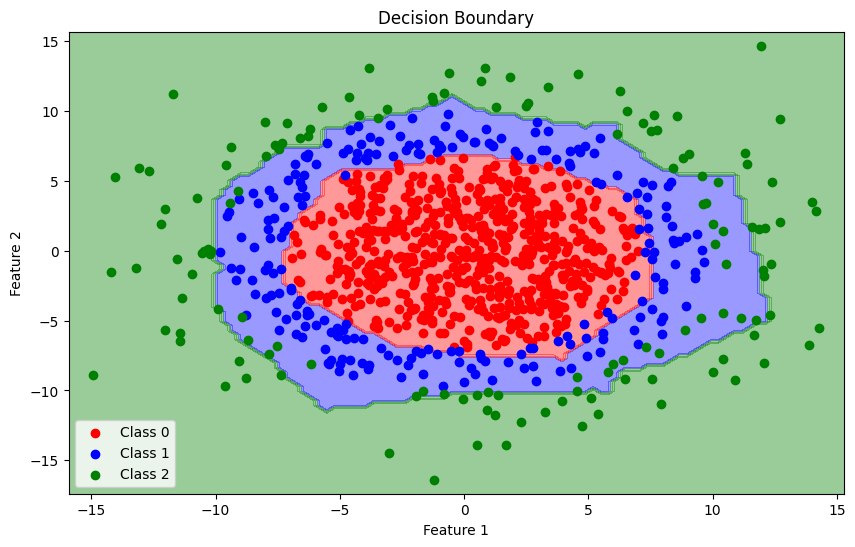

In [10]:
# Plot the decision boundary
def plot_multiclass_decision_boundary(nn, X, Y, title="Decision Boundary"):
    if Y.ndim > 1 and Y.shape[1] > 1:
        Y = np.argmax(Y, axis=1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    grid_points = np.c_[xx.ravel(), yy.ravel()]

    grid_predictions = nn.predict(grid_points)
    grid_predictions = np.argmax(grid_predictions, axis=1)

    grid_predictions = grid_predictions.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    cmap = ListedColormap(['red', 'blue', 'green'])
    plt.contourf(xx, yy, grid_predictions, alpha=0.4, cmap=cmap)

    unique_classes = np.unique(Y)
    colors = ['red', 'blue', 'green']
    for class_value, color in zip(unique_classes, colors):
        plt.scatter(X[Y == class_value][:, 0], X[Y == class_value][:, 1], color=color, label=f'Class {class_value}')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.show()
    
plot_multiclass_decision_boundary(nn, X, Y, title="Decision Boundary")